# Machine Learning, proyecto para el concurso, entrega grupal

#### Autores: 
##### Bruno Mora Hernández
##### Sala Malo Núñez
##### Modesto Gené Mabua
##### Jorge Martín
##### Blázquez, César Hernández Esperilla

### Cargamos librerías y datos

In [35]:
# Cargamos las librerías

#!pip install xgboost (ejecutar si no está instalado el paquete xgboost)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import nan as NA
import re
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
from sklearn.impute import KNNImputer
import pickle

In [36]:
# Cargamos los datos
df = pd.read_csv("Training.csv")
test = pd.read_csv("Test.csv")

In [37]:
# Conjunto de datos test
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [38]:
# Dimensiones de test
test.shape

(14850, 40)

In [39]:
# Conjunto de datos de entrenamiento
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [40]:
# Dimensiones del conjunto train
df.shape

(59400, 40)

In [41]:
#Fijamos como indice del df la columna "id"
df.set_index(["id"],inplace=True)

In [42]:
# Descripción del dataframe
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [43]:
# Revisamos el nombre de todas las columnas
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [44]:
# Revisamos el tipo de variables del df
df.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

### Recuento de valores nulos

In [45]:
# ¿Tenemos valores nulos?
df.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

Como dato interesante, tenemos que todas las variables con valores nulos son categóricas

In [46]:
# Separamos las variables categóricas de las continuas en dos listas
variables_categoricas = df.select_dtypes(include = "object")
variables_numericas = df.select_dtypes(include = "number")

Para ver un poco mejor la distribución de los datos, sería bueno mostrar los histogramas de distribución de datos, también sería buen momento para revisar la distribución de datos de las variables con valores nulos.

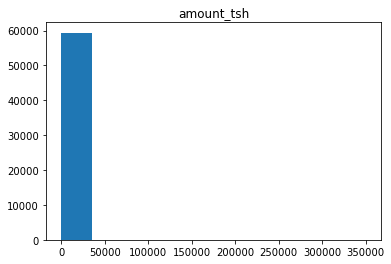

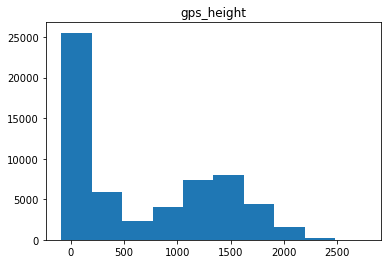

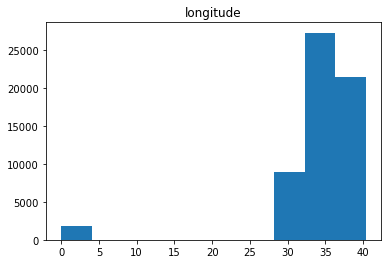

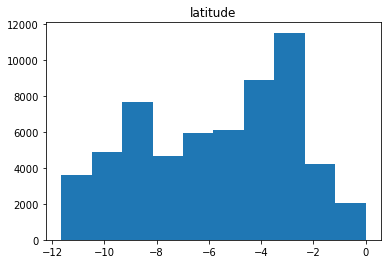

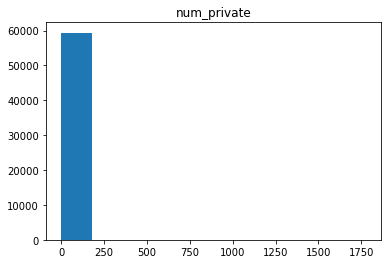

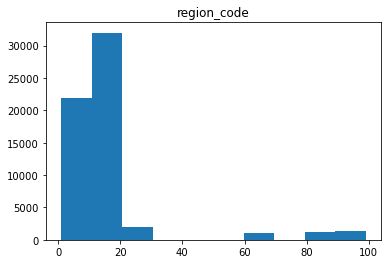

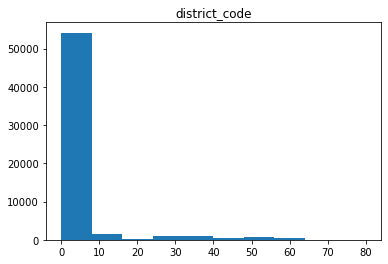

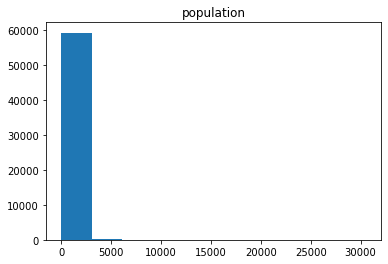

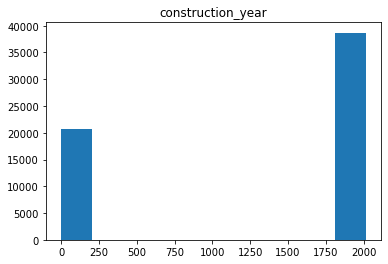

In [47]:
# Histograma con las variables numéricas
for l in variables_numericas:
    plt.hist(variables_numericas[l])
    plt.title(l)
    plt.show()

In [48]:
# Recuento de categorías de las variables categóricas
for i in variables_categoricas:
    print("------------------------------", i, "-----------------------------------" )
    print(variables_categoricas[i].value_counts(ascending=False))

------------------------------ date_recorded -----------------------------------
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2013-01-06      1
2004-01-07      1
2011-09-21      1
2002-10-14      1
2011-09-19      1
Name: date_recorded, Length: 356, dtype: int64
------------------------------ funder -----------------------------------
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Nassan                       1
Rajab Seleman                1
Bakwata                      1
Tasaf/tlc                    1
Mnyama                       1
Name: funder, Length: 1897, dtype: int64
------------------------------ installer -----------------------------------
DWE             17402
Government       1825
RWE              1206
Commu            1060
DANIDA           1050
                ...  
CCPK     

### Variable "funder"
Los valores nulos de la variable "funder" los sustituimos por "Desconocido"

In [17]:
# Rellenamos los valores nulos, primera forma
#df["funder"] = df.apply(lambda x:"Desconocido" if pd.isna(x["funder"]) else (x["funder"]), axis= 1)

In [32]:
# Rellenamos los valores nulos, segunda forma
df["funder"] = df["funder"].replace(np.nan, "Desconocido")

In [33]:
# Comprobamos que no haya valores nulos en "funder"
df["funder"].isnull().sum()

0

In [34]:
# Comprobamos la variable "funder" si tiene la nueva categoría "Desconocido"
df["funder"].value_counts(ascending = False).head(5)

Government Of Tanzania    9084
KNNImputer()              3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
Name: funder, dtype: int64

### Variable "installer"

In [21]:
# Rellenamos los valores nulos de "installer"
df["installer"] = df["installer"].replace(np.nan, "Desconocido")

In [22]:
# Comprobamos que no haya valores nulos en "installer"
df["installer"].isnull().sum()

0

In [23]:
# Comprobamos la variable "installer" si tiene la nueva categoría "Desconocido"
df["installer"].value_counts(ascending = False).head(5)

DWE            17402
Desconocido     3655
Government      1825
RWE             1206
Commu           1060
Name: installer, dtype: int64

### Variable "subvillage"

In [24]:
# Rellenamos los valores nulos de "subvillage"
df["subvillage"] = df["subvillage"].replace(np.nan, "Desconocido")

In [25]:
# Comprobamos que no haya valores nulos en "subvillage"
df["subvillage"].isnull().sum()

0

In [26]:
# Comprobamos la variable "subvillage" si tiene la nueva categoría "Desconocido"
df["subvillage"].value_counts(ascending = False).head(5)

Madukani       508
Shuleni        506
Majengo        502
Kati           373
Desconocido    371
Name: subvillage, dtype: int64

### Variable "public_meeting"

In [27]:
# Rellenamos los valores nulos de "public_meeting"
df["public_meeting"] = df["public_meeting"].replace(np.nan, "Desconocido")

In [28]:
# Comprobamos que no haya valores nulos en "public_meeting"
df["public_meeting"].isnull().sum()

0

In [29]:
# Comprobamos la variable "public_meeting" no tiene valores perdidos
df["public_meeting"].value_counts(ascending = False).head(3)

True           51011
False           5055
Desconocido     3334
Name: public_meeting, dtype: int64

### Variable "scheme_management"
Podríamos considerar meter dentro de la categoría "Other" los valores nulos y la categoría "None"

In [30]:
# Rellenamos los valores nulos de "scheme_management", agrupamos en la categoría "Other"
df["scheme_management"] = df["scheme_management"].replace([np.nan, "None", "Other"], "Other")

In [31]:
# Comprobamos que no haya valores nulos en "scheme_management"
df["scheme_management"].isnull().sum()

0

In [32]:
# Comprobamos la variable "scheme_management" no tiene valores perdidos
df["scheme_management"].value_counts(ascending = False).head(15)

VWC                 36793
WUG                  5206
Other                4644
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
SWC                    97
Trust                  72
Name: scheme_management, dtype: int64

 ### Variable "scheme_name"
 Agrupamos los valores perdidos en la categoría "None", pero debido al elevadísmo número de valores perdidos sería una candidadat a salir del modelo

In [33]:
# Rellenamos los valores nulos de "scheme_name", agrupamos en la categoría "None"
df["scheme_name"] = df["scheme_name"].replace([np.nan, "None"], "None")

In [34]:
# Comprobamos que no haya valores nulos en "scheme_name"
df["scheme_name"].isnull().sum()

0

In [35]:
# Comprobamos la variable "scheme_name" no tiene valores perdidos
df["scheme_name"].value_counts(ascending = False).head(10)

None                           28810
K                                682
Borehole                         546
Chalinze wate                    405
M                                400
DANIDA                           379
Government                       320
Ngana water supplied scheme      270
wanging'ombe water supply s      261
wanging'ombe supply scheme       234
Name: scheme_name, dtype: int64

### Variable "permit"
Los perdido los metemos en la cateoría desconocido, aunque quizá no serái mala idea meterlos en False

In [36]:
# Rellenamos los valores nulos de "permit" por la categoría "Desconocido"
df["permit"] = df["permit"].replace(np.nan, "Desconocido")

In [37]:
# Comprobamos que no haya valores nulos en "permit"
df["permit"].isnull().sum()

0

In [38]:
# Comprobamos la variable "permit" no tiene valores perdidos
df["permit"].value_counts(ascending = False).head(10)

True           38852
False          17492
Desconocido     3056
Name: permit, dtype: int64

## Eliminamos las variables/columnas con valores únicos no utilizables
Eliminación de variables de nuestro modelo (se especifica el motivo)

In [39]:
# Revisión de los valores únicos de todas las variables por si pudieramos eliminar más variables con poca variabilidad
for i in df:
    print("------------------------------", i, "-----------------------------------" )
    print(df[i].value_counts(ascending=False))

------------------------------ amount_tsh -----------------------------------
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
250000.0        1
220.0           1
350000.0        1
138000.0        1
38000.0         1
Name: amount_tsh, Length: 98, dtype: int64
------------------------------ date_recorded -----------------------------------
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-15      1
2011-09-16      1
2013-12-01      1
2011-09-21      1
2011-08-31      1
Name: date_recorded, Length: 356, dtype: int64
------------------------------ funder -----------------------------------
Government Of Tanzania    9084
Desconocido               3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Mama Ku                      1
Sisa                         1
Robert Mosi                  1
Sa

In [40]:
# Demasiados valores perdidos
df.drop(columns = ["scheme_name"], inplace = True)
# No hay descripcción de esta variable y los valores son muy raro 
df.drop(columns = ["num_private"], inplace = True)
# Poca variabilidad
df.drop(columns = ["recorded_by"], inplace = True)

In [41]:
# creamos categoría "Desconocido" en "construction_year" que agrupe los 0
#df["construction_year"] = df["construction_year"].replace(0, "Desconocido")

In [42]:
# Actualizamos la lista de las variables categóricas y numéricas
variables_categoricas = df.select_dtypes(include = "object")
variables_numericas = df.select_dtypes(include = "number")

### Transformación de variables categóricas a numéricas

In [43]:
# Recuento de categorías de las variables categóricas
for i in variables_categoricas:
    print("------------------------------", i, "-----------------------------------" )
    print(variables_categoricas[i].value_counts(ascending=False))

------------------------------ date_recorded -----------------------------------
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-15      1
2011-09-16      1
2013-12-01      1
2011-09-21      1
2011-08-31      1
Name: date_recorded, Length: 356, dtype: int64
------------------------------ funder -----------------------------------
Government Of Tanzania    9084
Desconocido               3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Mama Ku                      1
Sisa                         1
Robert Mosi                  1
Sakwidi                      1
Gra Na Halmashauri           1
Name: funder, Length: 1898, dtype: int64
------------------------------ installer -----------------------------------
DWE                17402
Desconocido         3655
Government          1825
RWE                 1206
Commu               1060
                

### Primero convertimos todas las booleanas en numéricas

In [44]:
# variables categóricas binarias
variables_categ_bin =["public_meeting","permit"]
for j in variables_categ_bin:
    df[j] = [0 if x == False else 1 for x in df[j]]

### Vamos con las categóricas

In [45]:
# Transformamos a numérica "date_recorded" dejando solamente el año

year = df['date_recorded'].apply(lambda x: x[:4]).astype(int)
df["date_recorded"] = year


t2 = LabelEncoder()
funder_n = t2.fit_transform(df["funder"])
df["funder"] = funder_n


t3 = LabelEncoder()
installer_n = t3.fit_transform(df["installer"])
df["installer"] = installer_n

t4 = LabelEncoder()
wpt_name_n = t4.fit_transform(df["wpt_name"])
df["wpt_name"] = wpt_name_n

t5 = LabelEncoder()
basin_n = t5.fit_transform(df["basin"])
df["basin"] = basin_n

t6 = LabelEncoder()
subvillage_n = t6.fit_transform(df["subvillage"])
df["subvillage"] = subvillage_n

t7 = LabelEncoder()
region_n = t7.fit_transform(df["region"])
df["region"] = region_n

t8 = LabelEncoder()
lga_n = t8.fit_transform(df["lga"])
df["lga"] = lga_n

t9 = LabelEncoder()
ward_n = t9.fit_transform(df["ward"])
df["ward"] = ward_n


t11 = LabelEncoder()
scheme_management_n = t11.fit_transform(df["scheme_management"])
df["scheme_management"] = scheme_management_n

t12 = LabelEncoder()
extraction_type_n = t12.fit_transform(df["extraction_type"])
df["extraction_type"] = extraction_type_n

t13 = LabelEncoder()
extraction_type_group_n = t13.fit_transform(df["extraction_type_group"])
df["extraction_type_group"] = extraction_type_group_n

t14 = LabelEncoder()
extraction_type_class_n = t14.fit_transform(df["extraction_type_class"])
df["extraction_type_class"] = extraction_type_class_n

t15 = LabelEncoder()
management_n = t15.fit_transform(df["management"])
df["management"] = management_n

t16 = LabelEncoder()
management_group_n = t16.fit_transform(df["management_group"])
df["management_group"] = management_group_n

t17 = LabelEncoder()
payment_n = t7.fit_transform(df["payment"])
df["payment"] = payment_n

t18 = LabelEncoder()
payment_type_n = t18.fit_transform(df["payment_type"])
df["payment_type"] = payment_type_n

t19 = LabelEncoder()
water_quality_n = t19.fit_transform(df["water_quality"])
df["water_quality"] = water_quality_n

t20 = LabelEncoder()
quality_group_n = t19.fit_transform(df["quality_group"])
df["quality_group"] = quality_group_n

t21 = LabelEncoder()
quantity_n = t19.fit_transform(df["quantity"])
df["quantity"] = quantity_n

t22 = LabelEncoder()
quantity_group_n = t19.fit_transform(df["quantity_group"])
df["quantity_group"] = quantity_group_n

t23 = LabelEncoder()
source_n = t23.fit_transform(df["source"])
df["source"] = source_n

t24= LabelEncoder()
source_type_n = t24.fit_transform(df["source_type"])
df["source_type"] = source_type_n

t25 = LabelEncoder()
source_class_n = t25.fit_transform(df["source_class"])
df["source_class"] = source_class_n

t26 = LabelEncoder()
waterpoint_type_n = t26.fit_transform(df["waterpoint_type"])
df["waterpoint_type"] = waterpoint_type_n

t27 = LabelEncoder()
waterpoint_type_group_n = t27.fit_transform(df["waterpoint_type_group"])
df["waterpoint_type_group"] = waterpoint_type_group_n

In [46]:
# Comprobador de que se han cambiado los tipo
df.dtypes

amount_tsh               float64
date_recorded              int32
funder                     int32
gps_height                 int64
installer                  int32
longitude                float64
latitude                 float64
wpt_name                   int32
basin                      int32
subvillage                 int32
region                     int32
region_code                int64
district_code              int64
lga                        int32
ward                       int32
population                 int64
public_meeting             int64
scheme_management          int32
permit                     int64
construction_year          int64
extraction_type            int32
extraction_type_group      int32
extraction_type_class      int32
management                 int32
management_group           int32
payment                    int32
payment_type               int32
water_quality              int32
quality_group              int32
quantity                   int32
quantity_g

Para comprobar que ahora todas las variables son numéricas podemos graficar todas las variables en histogramas y ver su distribución.

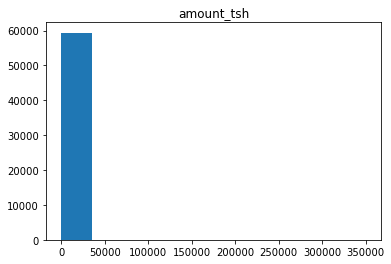

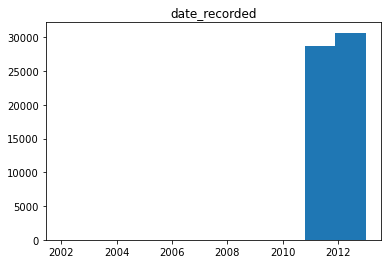

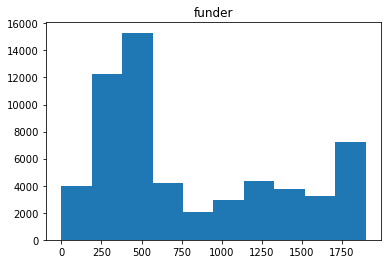

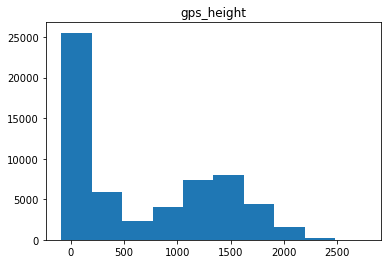

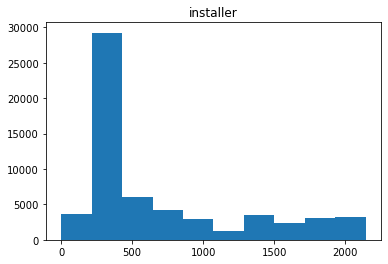

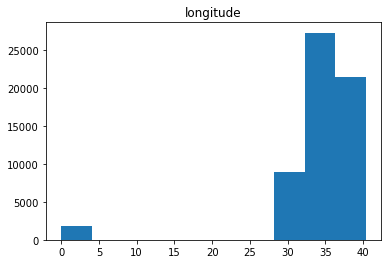

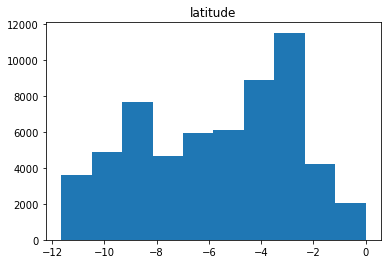

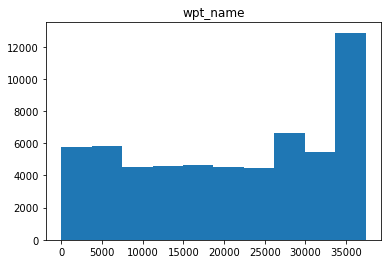

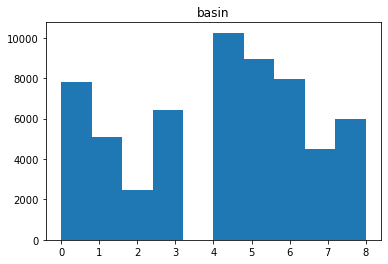

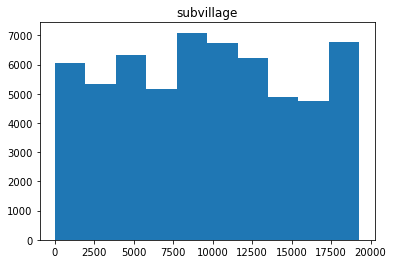

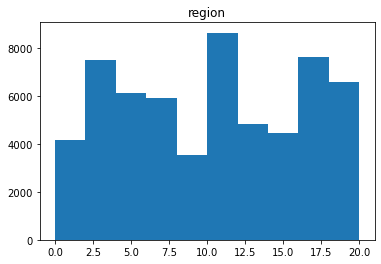

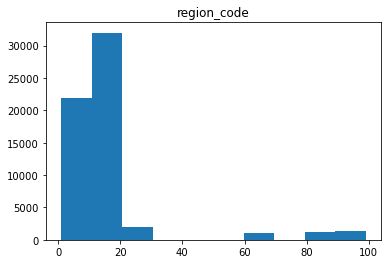

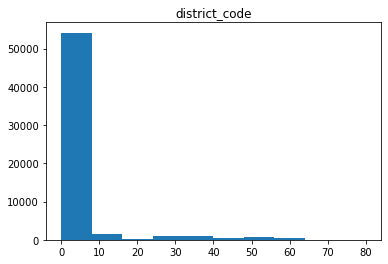

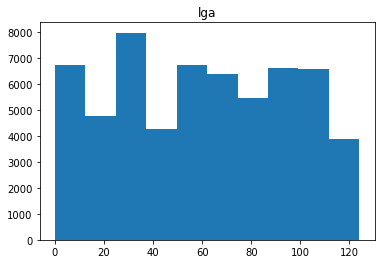

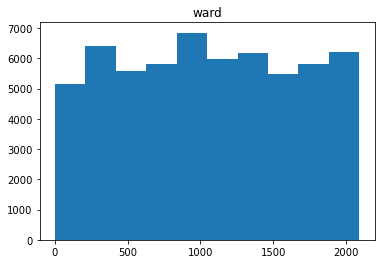

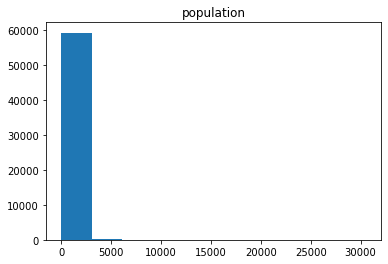

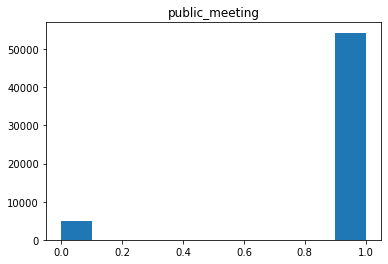

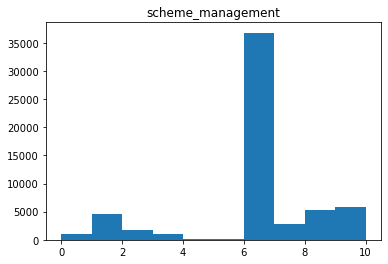

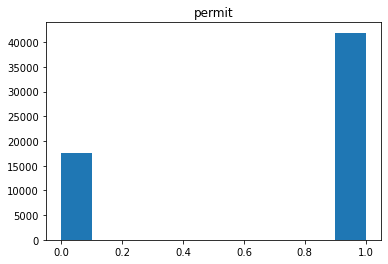

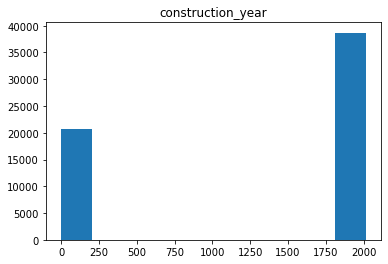

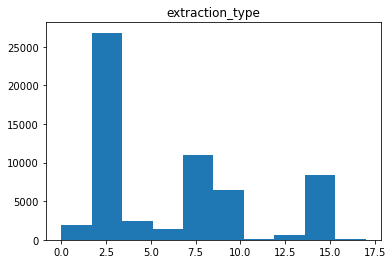

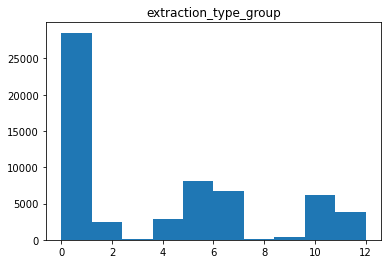

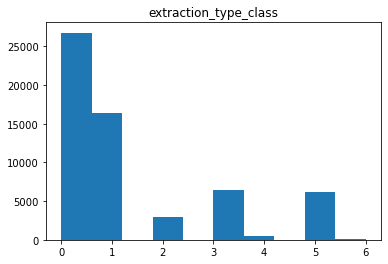

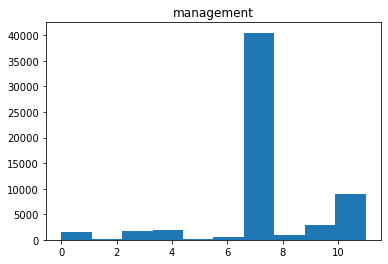

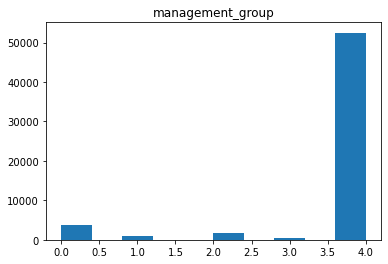

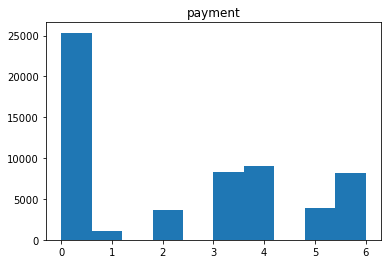

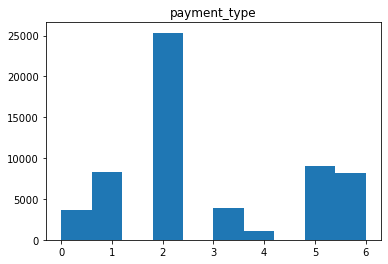

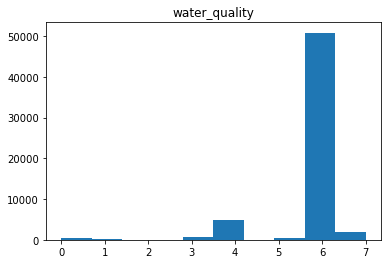

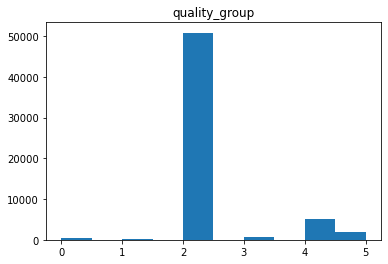

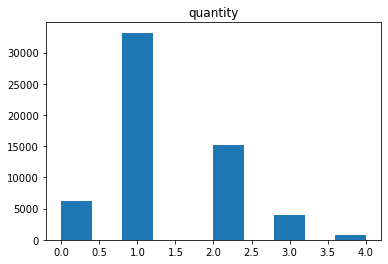

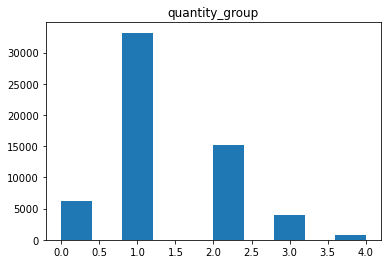

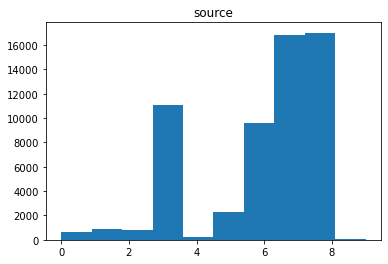

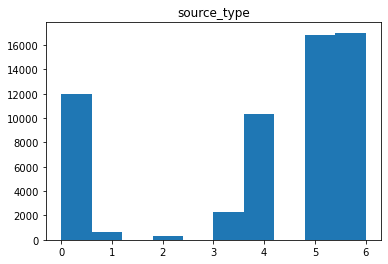

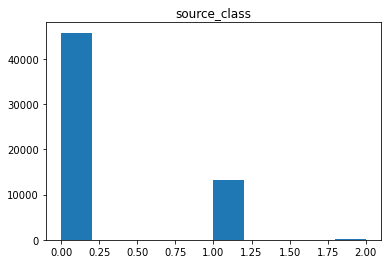

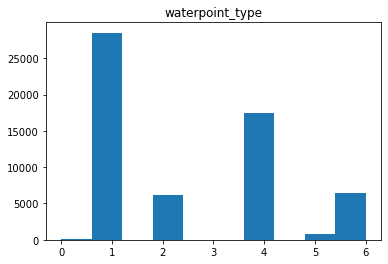

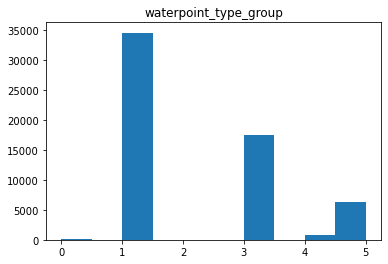

In [47]:
# Histograma con las variables numéricas
for l in df:
    plt.hist(df[l])
    plt.title(l)
    plt.show()

In [48]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011,1370,1390,1519,34.938093,-9.856322,37399,1,11808,...,0,6,2,1,1,8,6,0,1,1
8776,0.0,2013,470,1399,546,34.698766,-2.147466,37195,4,15839,...,2,6,2,2,2,5,3,1,1,1
34310,25.0,2013,826,686,2049,37.460664,-3.821329,14572,5,9075,...,5,6,2,1,1,0,1,1,2,1
67743,0.0,2013,1742,263,1853,38.486161,-11.155298,37285,7,8983,...,2,6,2,0,0,3,0,0,2,1
19728,0.0,2011,20,0,119,31.130847,-1.825359,35529,4,7699,...,2,6,2,3,3,5,3,1,1,1


### Multicolinealidad

In [49]:
from sklearn.linear_model import LinearRegression


df_vif = df.copy(deep = True)
features = list(df_vif.columns)
df_vif = df_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = df_vif[fet]
    y = df[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable amount_tsh es: 1.0384672412053517
El valor del VIF para la variable date_recorded es: 1.6489025657532388
El valor del VIF para la variable funder es: 1.509494838474732
El valor del VIF para la variable gps_height es: 3.3258995246446723
El valor del VIF para la variable installer es: 1.4911736997291187
El valor del VIF para la variable longitude es: 1.624944700600627
El valor del VIF para la variable latitude es: 1.8036879456608896
El valor del VIF para la variable wpt_name es: 1.0546753795383628
El valor del VIF para la variable basin es: 1.6335304324846833
El valor del VIF para la variable subvillage es: 1.0285794736057874
El valor del VIF para la variable region es: 1.5771349852380971
El valor del VIF para la variable region_code es: 2.3858349795291307
El valor del VIF para la variable district_code es: 2.1444706649282015
El valor del VIF para la variable lga es: 1.3549982694036566
El valor del VIF para la variable ward es: 1.0323911717037342
El valo

<ipython-input-49-b4ef39bbb2d1>:19: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))
<ipython-input-49-b4ef39bbb2d1>:19: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1 / (1 - model.score(x, y))


El valor del VIF para la variable source_type es: 11.170139942796519
El valor del VIF para la variable source_class es: 1.5251380960292231
El valor del VIF para la variable waterpoint_type es: 37.68705890282712
El valor del VIF para la variable waterpoint_type_group es: 35.27213399545989


Listado de variables con VIF mayor que 5 que quitaremos del modelo: "quantity_group", "waterpoint_type_group", "extraction_type_group", "source_type"

In [50]:
# Varibles que quitamos del df
df.drop(columns = ["waterpoint_type_group"], inplace = True)
df.drop(columns = ["quantity_group"], inplace = True)
df.drop(columns = ["extraction_type_group"], inplace = True)
df.drop(columns = ["source_type"], inplace = True)

In [51]:
# Listado de columnas del df
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object')

In [52]:
# Comprobamos si todos los valores VIF están por debajo de 5
from sklearn.linear_model import LinearRegression


df_vif = df.copy(deep = True)
features = list(df_vif.columns)
df_vif = df_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = df_vif[fet]
    y = df[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable amount_tsh es: 1.0380566539285745
El valor del VIF para la variable date_recorded es: 1.6220297633889689
El valor del VIF para la variable funder es: 1.4959224900020132
El valor del VIF para la variable gps_height es: 3.298693112866336
El valor del VIF para la variable installer es: 1.4842424250442137
El valor del VIF para la variable longitude es: 1.6235078932668234
El valor del VIF para la variable latitude es: 1.766981992257228
El valor del VIF para la variable wpt_name es: 1.0544035358520762
El valor del VIF para la variable basin es: 1.6305862477797064
El valor del VIF para la variable subvillage es: 1.0282905080870481
El valor del VIF para la variable region es: 1.5701889222300593
El valor del VIF para la variable region_code es: 2.3529611843440428
El valor del VIF para la variable district_code es: 2.1333641735428435
El valor del VIF para la variable lga es: 1.3418457721342165
El valor del VIF para la variable ward es: 1.0297654802420573
El valo

### Limpieza del conjunto del concurso (test)

In [53]:
# Rellenamos los valores nulos, segunda forma
test["funder"] = test["funder"].replace(np.nan, "Desconocido")
# Rellenamos los valores nulos de "installer"
test["installer"] = test["installer"].replace(np.nan, "Desconocido")
# Rellenamos los valores nulos de "subvillage"
test["subvillage"] = test["subvillage"].replace(np.nan, "Desconocido")
# Rellenamos los valores nulos de "public_meeting"
test["public_meeting"] = test["public_meeting"].replace(np.nan, "Desconocido")
# Rellenamos los valores nulos de "scheme_management", agrupamos en la categoría "Other"
test["scheme_management"] = test["scheme_management"].replace([np.nan, "None", "Other"], "Other")
# Rellenamos los valores nulos de "scheme_name", agrupamos en la categoría "None"
test["scheme_name"] = test["scheme_name"].replace([np.nan, "None"], "None")
# Rellenamos los valores nulos de "permit" por la categoría "Desconocido"
test["permit"] = test["permit"].replace(np.nan, "Desconocido")

In [54]:
# eliminamos variables que no utilizaremos en el modelo
# Demasiados valores perdidos
test.drop(columns = ["scheme_name"], inplace = True)
# No hay descripcción de esta variable y los valores son muy raro 
test.drop(columns = ["num_private"], inplace = True)
# Poca variabilidad
test.drop(columns = ["recorded_by"], inplace = True)

In [55]:
# variables categóricas binarias
variables_categ_bin =["public_meeting","permit"]
for j in variables_categ_bin:
    test[j] = [0 if x == False else 1 for x in test[j]]

In [56]:
year = test['date_recorded'].apply(lambda x: x[:4]).astype(int)
test["date_recorded"] = year

t2 = LabelEncoder()
funder_n = t2.fit_transform(test["funder"])
test["funder"] = funder_n

t3 = LabelEncoder()
installer_n = t3.fit_transform(test["installer"])
test["installer"] = installer_n

t4 = LabelEncoder()
wpt_name_n = t4.fit_transform(test["wpt_name"])
test["wpt_name"] = wpt_name_n

t5 = LabelEncoder()
basin_n = t5.fit_transform(test["basin"])
test["basin"] = basin_n

t6 = LabelEncoder()
subvillage_n = t6.fit_transform(test["subvillage"])
test["subvillage"] = subvillage_n

t7 = LabelEncoder()
region_n = t7.fit_transform(test["region"])
test["region"] = region_n

t8 = LabelEncoder()
lga_n = t8.fit_transform(test["lga"])
test["lga"] = lga_n

t9 = LabelEncoder()
ward_n = t9.fit_transform(test["ward"])
test["ward"] = ward_n

t11 = LabelEncoder()
scheme_management_n = t11.fit_transform(test["scheme_management"])
test["scheme_management"] = scheme_management_n

t12 = LabelEncoder()
extraction_type_n = t12.fit_transform(test["extraction_type"])
test["extraction_type"] = extraction_type_n

t13 = LabelEncoder()
extraction_type_group_n = t13.fit_transform(test["extraction_type_group"])
test["extraction_type_group"] = extraction_type_group_n

t14 = LabelEncoder()
extraction_type_class_n = t14.fit_transform(test["extraction_type_class"])
test["extraction_type_class"] = extraction_type_class_n

t15 = LabelEncoder()
management_n = t15.fit_transform(test["management"])
test["management"] = management_n

t16 = LabelEncoder()
management_group_n = t16.fit_transform(test["management_group"])
test["management_group"] = management_group_n

t17 = LabelEncoder()
payment_n = t7.fit_transform(test["payment"])
test["payment"] = payment_n

t18 = LabelEncoder()
payment_type_n = t18.fit_transform(test["payment_type"])
test["payment_type"] = payment_type_n

t19 = LabelEncoder()
water_quality_n = t19.fit_transform(test["water_quality"])
test["water_quality"] = water_quality_n

t20 = LabelEncoder()
quality_group_n = t19.fit_transform(test["quality_group"])
test["quality_group"] = quality_group_n

t21 = LabelEncoder()
quantity_n = t19.fit_transform(test["quantity"])
test["quantity"] = quantity_n

t22 = LabelEncoder()
quantity_group_n = t19.fit_transform(test["quantity_group"])
test["quantity_group"] = quantity_group_n

t23 = LabelEncoder()
source_n = t23.fit_transform(test["source"])
test["source"] = source_n

t24= LabelEncoder()
source_type_n = t24.fit_transform(test["source_type"])
test["source_type"] = source_type_n

t25 = LabelEncoder()
source_class_n = t25.fit_transform(test["source_class"])
test["source_class"] = source_class_n

t26 = LabelEncoder()
waterpoint_type_n = t26.fit_transform(test["waterpoint_type"])
test["waterpoint_type"] = waterpoint_type_n

t27 = LabelEncoder()
waterpoint_type_group_n = t27.fit_transform(test["waterpoint_type_group"])
test["waterpoint_type_group"] = waterpoint_type_group_n

In [57]:
# Varibles que quitamos del df, debido a la multicolinealidad
test.drop(columns = ["waterpoint_type_group"], inplace = True)
test.drop(columns = ["quantity_group"], inplace = True)
test.drop(columns = ["extraction_type_group"], inplace = True)
test.drop(columns = ["source_type"], inplace = True)

In [58]:
test.shape

(14850, 33)

In [59]:
test.set_index(["id"],inplace=True)

### Muestreo estratificado, conjuntos train-test

In [60]:
# Cargamos la variable objetivo
target = pd.read_csv("Training_labels.csv")
# Fijamos el indice
target.set_index("id", inplace = True)

In [61]:
# la target es categórica, hay que convertirla a numérica
target.dtypes

status_group    object
dtype: object

In [62]:
# Convertimos la target a numérica y sustituímos en la variable original
t28 = LabelEncoder()
status_group_n = t28.fit_transform(target["status_group"])
target["status_group"] = status_group_n

In [63]:
# Muestreo estratificado

# Este es el muestreo estratificado con la función train_test_split
X_train, X_test, y_train, y_test = train_test_split( df,    # Conjunto de datos que queremos dividir y muestrear
                        target,     # Nuestra variable target (ya convertida a numérica)
                        test_size=0.3, # Tamaño del test, también podemos poner el train_size=0.8
                        random_state=42, # Semilla de aletorización
                        stratify = target) # Columna por la que queremos estratificar los datos

In [64]:
X_train.shape

(41580, 32)

In [65]:
X_test.shape

(17820, 32)

In [66]:
y_train.shape

(41580, 1)

In [67]:
y_test.shape

(17820, 1)

In [68]:
# Al conjunto de entrenamiento X ya le podemos pegar el y
traindf = pd.concat([X_train,y_train], axis=1)

In [69]:
testdf = X_test

In [70]:
# Ya tendríamos el conjunto de entranamiento con nuestra target
traindf.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
id,,,,,,,,,,,,,,,,,,,,,
71045,0.0,2013,457,1410,390,36.667568,-3.353465,5142,5,3520,...,4,6,6,6,2,1,8,0,1,0
51874,0.0,2013,422,1161,520,33.637501,-2.139160,6738,4,12445,...,0,6,6,6,2,1,2,1,2,0
42688,0.0,2013,1800,1184,1899,36.854557,-2.977996,35529,0,8769,...,2,5,3,6,2,2,6,1,1,0
53295,0.0,2011,457,0,537,33.023974,-2.933736,11849,4,3672,...,1,0,2,6,2,1,2,1,2,2
67849,0.0,2013,1866,1331,572,36.528004,-5.674631,16816,8,1471,...,4,0,2,4,4,2,3,0,2,2


In [71]:
X_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,
71045,0.0,2013,457,1410,390,36.667568,-3.353465,5142,5,3520,...,7,4,6,6,6,2,1,8,0,1
51874,0.0,2013,422,1161,520,33.637501,-2.139160,6738,4,12445,...,0,0,6,6,6,2,1,2,1,2
42688,0.0,2013,1800,1184,1899,36.854557,-2.977996,35529,0,8769,...,3,2,5,3,6,2,2,6,1,1
53295,0.0,2011,457,0,537,33.023974,-2.933736,11849,4,3672,...,1,1,0,2,6,2,1,2,1,2
67849,0.0,2013,1866,1331,572,36.528004,-5.674631,16816,8,1471,...,7,4,0,2,4,4,2,3,0,2


### Análisis de variables

In [72]:
# gráfico de correlación de las variables con la objetivo
corr = abs(traindf.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
waterpoint_type,0.208749
extraction_type_class,0.177872
quality_group,0.155780
quantity,0.130004
gps_height,0.119709
extraction_type,0.108829
region_code,0.107211
source,0.097544
region,0.092609


### Escalado de variables

In [73]:
## Prueba ejemplo de escalado (cuando el modelo de ML le da más importancia a una categoría que a otra).
## Prueba por estandarización
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
traindf_standarized= sc.fit_transform(traindf)

In [74]:
traindf_standarized[0]

array([-0.09711458,  1.12529015, -0.60222746,  1.06559902, -0.59754935,
        0.39420758,  0.80360669, -1.33260052,  0.37444465, -1.10049267,
       -1.65515639, -0.75577316, -0.3752727 , -1.70363389, -0.55706764,
        0.04263891,  0.30482172,  0.03944029,  0.64585572,  0.74348512,
       -0.78777247, -0.77682366, -0.13980647,  0.33843654,  1.62520701,
        1.7238915 ,  0.27560164, -0.33662048, -0.40876806,  0.95005737,
       -0.53681214, -0.88600038, -0.88564467])

In [75]:
# convertimos a df el array
traindf_st = pd.DataFrame(traindf_standarized, index = traindf.index, columns = traindf.columns)

In [76]:
# df estandarizado
traindf_st.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
id,,,,,,,,,,,,,,,,,,,,,
71045,-0.097115,1.125290,-0.602227,1.065599,-0.597549,0.394208,0.803607,-1.332601,0.374445,-1.100493,...,0.338437,1.625207,1.723891,0.275602,-0.336620,-0.408768,0.950057,-0.536812,-0.886000,-0.885645
51874,-0.097115,1.125290,-0.663415,0.706611,-0.363827,-0.069011,1.216591,-1.199657,-0.029725,0.518504,...,-3.464345,1.625207,1.723891,0.275602,-0.336620,-0.408768,-2.010180,1.762863,-0.324972,-0.885645
42688,-0.097115,1.125290,1.745624,0.739770,2.115429,0.422793,0.931303,1.198580,-1.646402,-0.148323,...,-1.562954,1.184728,0.088819,0.275602,-0.336620,0.837041,-0.036689,1.762863,-0.886000,-0.885645
53295,-0.097115,-0.956235,-0.602227,-0.967226,-0.333263,-0.162803,0.946356,-0.773920,-0.029725,-1.072920,...,-2.513649,-1.017668,-0.456205,0.275602,-0.336620,-0.408768,-2.010180,1.762863,-0.324972,1.220091
67849,-0.097115,1.125290,1.861006,0.951703,-0.270338,0.372872,0.014180,-0.360178,1.586952,-1.472182,...,0.338437,-1.017668,-0.456205,-1.923500,2.203151,0.837041,-1.516807,-0.536812,-0.324972,1.220091


In [77]:
# Correlación de los datos con escalado estandar
corr = abs(traindf_st.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
waterpoint_type,0.208749
extraction_type_class,0.177872
quality_group,0.155780
quantity,0.130004
gps_height,0.119709
extraction_type,0.108829
region_code,0.107211
source,0.097544
region,0.092609


In [78]:
# Escalado por normalización
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0, 1))
scalar.fit(traindf)
traindf_normalized = scalar.transform(traindf)

In [79]:
traindf_normalized[0]

array([0.        , 1.        , 0.24090669, 0.51994352, 0.18181818,
       0.90886613, 0.71213507, 0.13746724, 0.625     , 0.18250635,
       0.        , 0.01020408, 0.025     , 0.        , 0.3472023 ,
       0.0130719 , 1.        , 0.6       , 1.        , 0.99850969,
       0.17647059, 0.        , 0.63636364, 1.        , 1.        ,
       1.        , 0.85714286, 0.4       , 0.25      , 0.88888889,
       0.        , 0.16666667, 0.        ])

In [80]:
# convertimos a df el array
traindf_nr = pd.DataFrame(traindf_normalized, index = traindf.index, columns = traindf.columns)

In [81]:
traindf_nr.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
id,,,,,,,,,,,,,,,,,,,,,
71045,0.0,1.000000,0.240907,0.519944,0.181818,0.908866,0.712135,0.137467,0.625,0.182506,...,1.00,1.000000,1.000000,0.857143,0.4,0.25,0.888889,0.0,0.166667,0.0
51874,0.0,1.000000,0.222457,0.432051,0.242424,0.833761,0.816372,0.180143,0.500,0.645253,...,0.00,1.000000,1.000000,0.857143,0.4,0.25,0.222222,0.5,0.333333,0.0
42688,0.0,1.000000,0.948867,0.440169,0.885315,0.913501,0.744366,0.949997,0.000,0.454659,...,0.50,0.833333,0.500000,0.857143,0.4,0.50,0.666667,0.5,0.166667,0.0
53295,0.0,0.818182,0.240907,0.022238,0.250350,0.818554,0.748165,0.316808,0.500,0.190387,...,0.25,0.000000,0.333333,0.857143,0.4,0.25,0.222222,0.5,0.333333,1.0
67849,0.0,1.000000,0.983658,0.492058,0.266667,0.905407,0.512884,0.449623,1.000,0.076269,...,1.00,0.000000,0.333333,0.571429,0.8,0.50,0.333333,0.0,0.333333,1.0


In [82]:
# Correlación de los datos escalados por normalización
corr = abs(traindf_nr.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
waterpoint_type,0.208749
extraction_type_class,0.177872
quality_group,0.155780
quantity,0.130004
gps_height,0.119709
extraction_type,0.108829
region_code,0.107211
source,0.097544
region,0.092609


### Busqueda de Outliers
 Boxplot(todas las variables)

<ipython-input-83-8c81c06a3c41>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


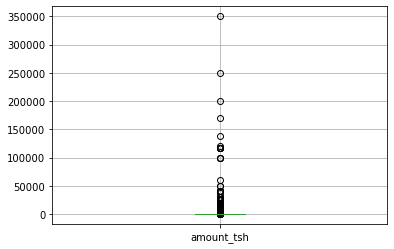

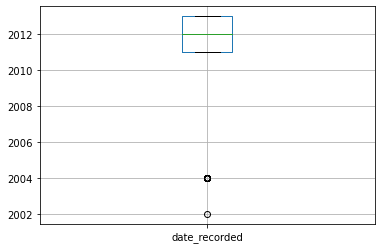

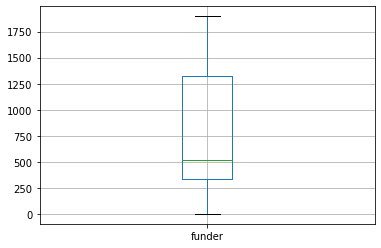

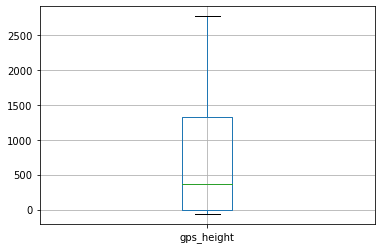

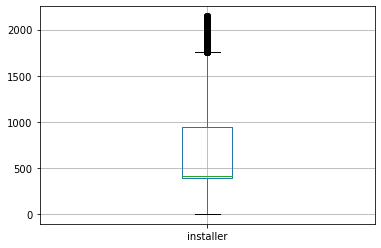

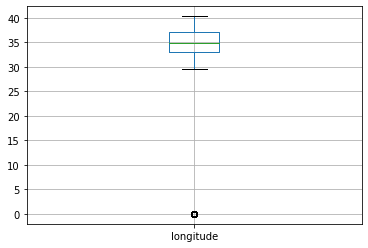

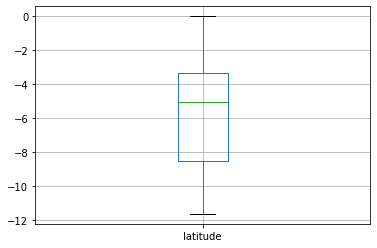

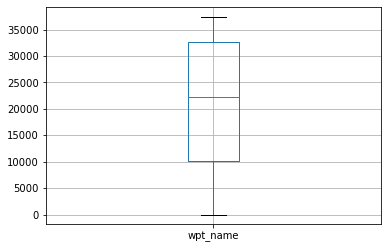

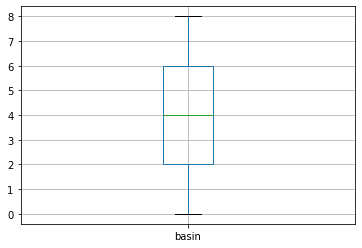

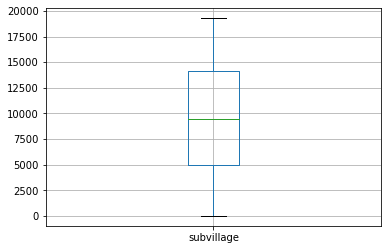

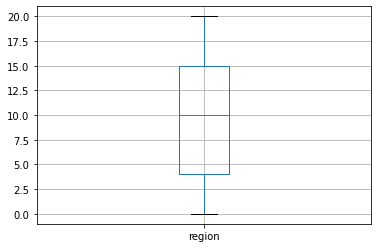

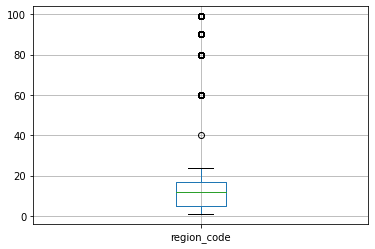

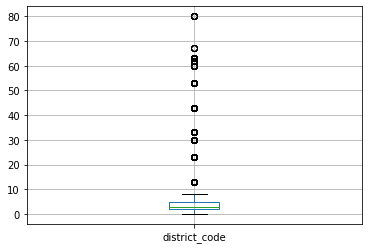

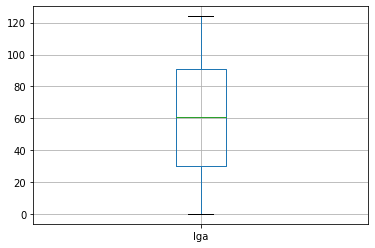

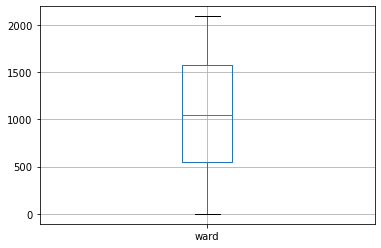

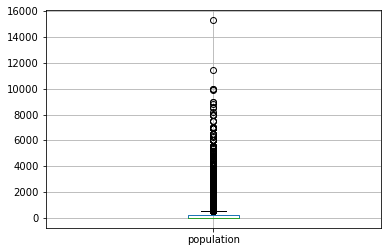

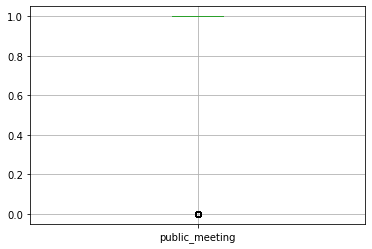

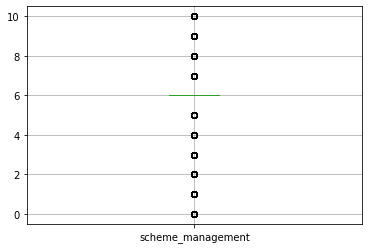

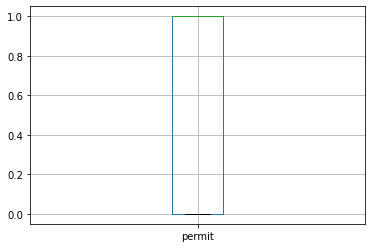

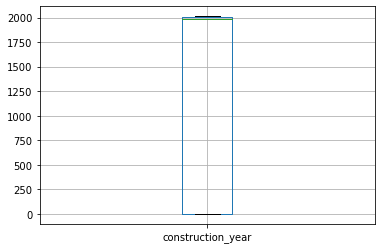

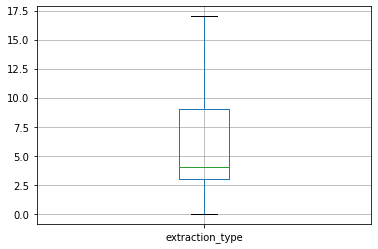

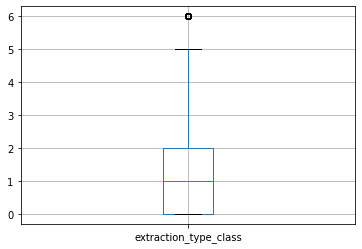

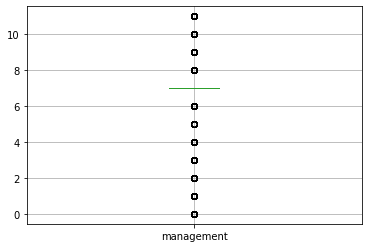

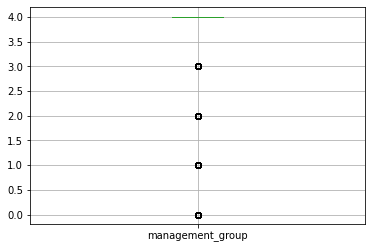

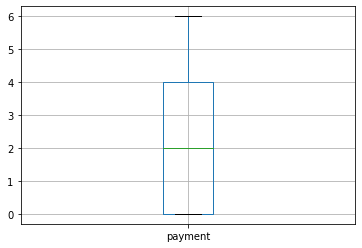

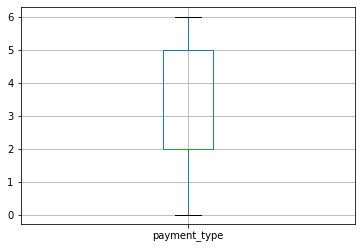

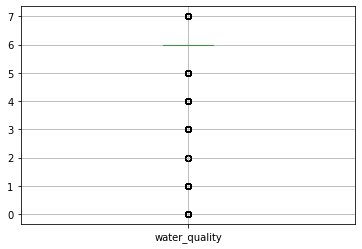

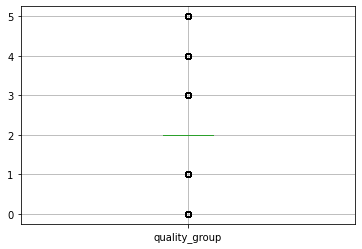

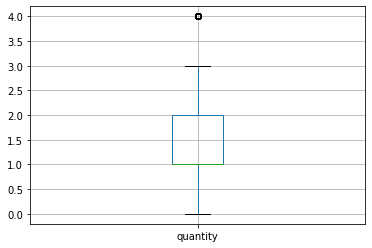

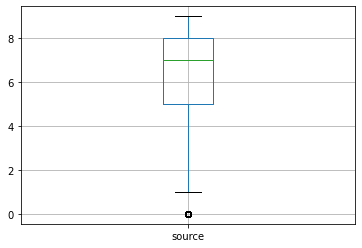

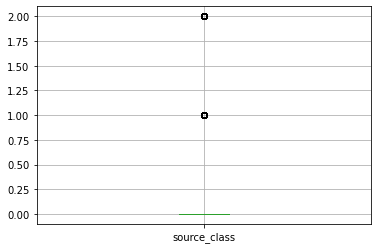

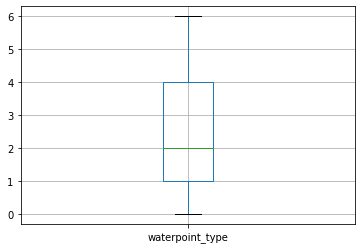

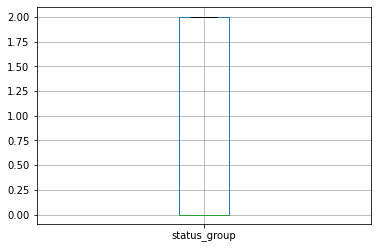

In [83]:
# Búsqueda de los outliers por variable

for column in traindf:
    plt.figure()
    traindf.boxplot([column])

### Finalmente guardamos los conjuntos

In [84]:
traindf.to_csv("train_p.csv") # Nuestro conjunto de entrenamiento

In [85]:
testdf.to_csv("test_p.csv") # Conjunto de prueba

 ## Técnicas de clasificación

 ### Árboles de decisión

In [86]:
# árboles de decisión
modelo1 = DecisionTreeClassifier().fit(X_train, y_train)
y_pred= modelo1.predict(X_test)
y_pred_test = modelo1.predict(test)

In [87]:
# Predicción con el conjunto de datos del concurso
y_pred_test

array([2, 0, 0, ..., 0, 0, 2])

In [88]:
# Métricas
print('matriz de confusión:')
print(confusion_matrix(y_test, y_pred))
print('precision:')
print(precision_score(y_test, y_pred, average = "micro"))
print('accuracy:')
print(accuracy_score(y_test, y_pred))
print('recall')
print(recall_score(y_test, y_pred, average = "micro"))
print('f1')
print(f1_score(y_test, y_pred, average = "micro"))

matriz de confusión:
[[7507  673 1498]
 [ 556  474  265]
 [1440  252 5155]]
precision:
0.7371492704826038
accuracy:
0.7371492704826038
recall
0.7371492704826038
f1
0.7371492704826038


### Random Forest

In [89]:
modelo2 = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train.values.ravel())
# predicciones
y_pred = modelo2.predict(X_test)
y_pred_test = modelo2.predict(test)

In [90]:
# validación cruzada repetida
resultados = cross_val_score(estimator=modelo2, X=X_train, y=y_train.values.ravel(), cv=5)

In [91]:
resultados

array([0.80074555, 0.79930255, 0.80387205, 0.8044733 , 0.80459355])

In [92]:
print(resultados.mean())

0.8025974025974026


In [93]:
# Varianza muy baja, el resultado de la predicción no es casual, hemos entrenado al modelo 5 veces
print(resultados.std())

0.0021639676535261192


In [94]:
print(y_pred)

[0 1 2 ... 0 2 2]


In [95]:
# Predicción con el conjunto de datos del concurso
y_pred_test

array([2, 0, 0, ..., 0, 0, 2])

Nos vamos a quedar con las predicciones "y_pred_test" utilizando el "modelo2". Lo que vamos a a hacer a continuación es constuír el nuevo df con las predicciones de nuestro modelo y cada predicción con su id.

In [96]:
# Guardamos los id de nuestro dataset test en una variable
indices = test.index

In [97]:
# Creamos el df con una columna que contendrá las predicciones contenidad por "y_pred_test"
df_final = pd.DataFrame(y_pred_test)
# Reenombramos la columna
df_final = df_final.rename(columns = {0: "status_group"})

In [98]:
# Quitamos ya el labelencoder, sustituímos ya los valores enteros por sus correspondientes estados de "status_group"
df_final.status_group = df_final.status_group.replace({ 0 : "functional", 2: "non functional", 1 : "functional needs repair"})

In [99]:
# metemos una nueva columna con los "id"
df_final["id"] = indices
# fijamos como índice los "id"
df_final = df_final.set_index("id")

In [100]:
# Comprobamos el resultado final
df_final

,status_group
id,
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional
...,...
39307,non functional
18990,functional
28749,functional


In [101]:
# Guaradmos el df final con las predicciones
df_final.to_csv("ModeloRF.csv")

In [189]:
# Métricas
print('matriz de confusión:')
print(confusion_matrix(y_test, y_pred))
print('precision:')
print(precision_score(y_test, y_pred, average = "micro"))
print('accuracy:')
print(accuracy_score(y_test, y_pred))
print('recall')
print(recall_score(y_test, y_pred, average = "micro"))
print('f1')
print(f1_score(y_test, y_pred, average = "micro"))

matriz de confusión:
[[8649  236  793]
 [ 671  424  200]
 [1414   85 5348]]
precision:
0.8092592592592592
accuracy:
0.8092592592592592
recall
0.8092592592592592
f1
0.8092592592592593


In [190]:
y_train_bin = label_binarize(y_train, classes=[0,1,2])
y_test_bin = label_binarize(y_test, classes=[0,1,2])

## Ensemble models

### Boosting

In [223]:
%time
modelo3 = XGBClassifier(use_label_encoder = False) # hiperparámetro use_label_encoder para solucionar problema con labels
modelo3.fit(X_train, y_train)
#Predicciones
y_pred = modelo3.predict(X_test)
y_pred_test = modelo3.predict(test)

Wall time: 0 ns
[16:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [192]:
y_pred

array([0, 1, 2, ..., 0, 2, 2], dtype=int64)

In [224]:
# Predicción con el conjunto de datos del concurso
y_pred_test

array([0, 2, 0, ..., 0, 0, 2], dtype=int64)

In [193]:
# Métricas
print('matriz de confusión:')
print(confusion_matrix(y_test, y_pred))
print('precision:')
print(precision_score(y_test, y_pred, average = "micro"))
print('accuracy:')
print(accuracy_score(y_test, y_pred))
print('recall')
print(recall_score(y_test, y_pred, average = "micro"))
print('f1')
print(f1_score(y_test, y_pred, average = "micro"))

matriz de confusión:
[[8824  139  715]
 [ 763  334  198]
 [1698   64 5085]]
precision:
0.799270482603816
accuracy:
0.799270482603816
recall
0.799270482603816
f1
0.7992704826038158


### Bagging

 #Para solucionar problemas con el y_train:
 
.values nos dará los valores en array. (shape: (n,1)

.ravel convertirá la dimensión de ese array a (n, )

In [213]:
modelo4 = RandomForestClassifier(max_depth=2, random_state=42)
modelo4.fit(X_train, y_train.values.ravel()) #y_train tiene que ser un array 1d, convertivos de vector a array
# Predicciones
y_pred = modelo4.predict(X_test)
y_pred_test = modelo4.predict(test)

In [214]:
# Predicción
y_pred

array([0, 0, 2, ..., 0, 2, 2])

In [215]:
# Predicción con el conjunto de datos del concurso
y_pred_test

array([2, 0, 2, ..., 0, 0, 2])

In [196]:
# Métricas
print('matriz de confusión:')
print(confusion_matrix(y_test, y_pred))
print('precision:')
print(precision_score(y_test, y_pred, average = "micro"))
print('accuracy:')
print(accuracy_score(y_test, y_pred))
print('recall')
print(recall_score(y_test, y_pred, average = "micro"))
print('f1')
print(f1_score(y_test, y_pred, average = "micro"))

matriz de confusión:
[[9396    0  282]
 [1224    0   71]
 [3958    0 2889]]
precision:
0.6893939393939394
accuracy:
0.6893939393939394
recall
0.6893939393939394
f1
0.6893939393939394
